In [2]:
import torch
import torch.nn.functional as F
from matplotlib import pyplot as plt

In [3]:
# !pip install torch
import os
os.environ["CUDA_VISIBLE_DEVICES"]='1'
device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')

In [3]:
l = torch.ones(2,3)
m = torch.arange(12)
m = m.reshape(4,3)
print('l.shape', l.shape)
print('m.shape', m.shape)

l.shape torch.Size([2, 3])
m.shape torch.Size([4, 3])


In [4]:
l

tensor([[1., 1., 1.],
        [1., 1., 1.]])

In [5]:
l.sum(0)

tensor([2., 2., 2.])

In [6]:
l.sum(1)

tensor([3., 3.])

In [7]:
m

tensor([[ 0,  1,  2],
        [ 3,  4,  5],
        [ 6,  7,  8],
        [ 9, 10, 11]])

In [10]:
n = m+10
n

tensor([[10, 11, 12],
        [13, 14, 15],
        [16, 17, 18],
        [19, 20, 21]])

In [87]:
m = m.unsqueeze(1)
m

tensor([[[ 0,  1,  2]],

        [[ 3,  4,  5]],

        [[ 6,  7,  8]],

        [[ 9, 10, 11]]])

In [88]:
print('m.shape =',m.shape)

m.shape = torch.Size([4, 1, 3])


In [89]:
new_m = m-l
new_m

tensor([[[-1.,  0.,  1.],
         [-1.,  0.,  1.]],

        [[ 2.,  3.,  4.],
         [ 2.,  3.,  4.]],

        [[ 5.,  6.,  7.],
         [ 5.,  6.,  7.]],

        [[ 8.,  9., 10.],
         [ 8.,  9., 10.]]])

In [90]:
new_m.shape

torch.Size([4, 2, 3])

In [91]:
new_m = torch.sum(new_m,2)
new_m

tensor([[ 0.,  0.],
        [ 9.,  9.],
        [18., 18.],
        [27., 27.]])

In [ ]:
u_p = torch.matmul(l,m)

In [95]:
0 - (1e-5)

-1e-05

In [94]:
u_p.shape

torch.Size([3, 4, 2])

In [95]:
u_p

tensor([[[  2,   3],
         [  6,  11],
         [ 10,  19],
         [ 14,  27]],

        [[ 86, 103],
         [106, 127],
         [126, 151],
         [146, 175]],

        [[298, 331],
         [334, 371],
         [370, 411],
         [406, 451]]])

In [96]:
l

tensor([[[ 0,  1],
         [ 2,  3],
         [ 4,  5],
         [ 6,  7]],

        [[ 8,  9],
         [10, 11],
         [12, 13],
         [14, 15]],

        [[16, 17],
         [18, 19],
         [20, 21],
         [22, 23]]])

In [97]:
m

tensor([[[ 0,  1],
         [ 2,  3]],

        [[ 4,  5],
         [ 6,  7]],

        [[ 8,  9],
         [10, 11]]])

In [110]:
u_p = u_p.unsqueeze(2)

In [111]:
 mask = torch.eye(3)[:, :, None, None]

In [112]:
mask.shape

torch.Size([3, 3, 1, 1])

In [113]:
u_n = torch.rand(3, 3, 4, 2)

In [114]:
n_mask

tensor([[[[0.]],

         [[1.]],

         [[1.]]],


        [[[1.]],

         [[0.]],

         [[1.]]],


        [[[1.]],

         [[1.]],

         [[0.]]]])

In [115]:
n_mask = 1 - mask

# Masking is done by shifting the diagonal before exp.
u_n = n_mask * u_n - (10. * (1 - n_mask))  # mask out "self" examples

In [116]:
u_n.reshape(3, 3 * 4, 2).unsqueeze(dim=1)

tensor([[[[-10.0000, -10.0000],
          [-10.0000, -10.0000],
          [-10.0000, -10.0000],
          [-10.0000, -10.0000],
          [  0.1381,   0.7427],
          [  0.7186,   0.2501],
          [  0.2010,   0.4882],
          [  0.9226,   0.3320],
          [  0.7874,   0.6489],
          [  0.6301,   0.6404],
          [  0.0927,   0.4310],
          [  0.4231,   0.7222]]],


        [[[  0.3367,   0.7689],
          [  0.0250,   0.5507],
          [  0.1597,   0.7935],
          [  0.9058,   0.9654],
          [-10.0000, -10.0000],
          [-10.0000, -10.0000],
          [-10.0000, -10.0000],
          [-10.0000, -10.0000],
          [  0.1252,   0.9963],
          [  0.9224,   0.3432],
          [  0.1097,   0.1754],
          [  0.4272,   0.4856]]],


        [[[  0.4878,   0.1690],
          [  0.7904,   0.7300],
          [  0.7705,   0.1622],
          [  0.2496,   0.9044],
          [  0.1288,   0.6975],
          [  0.9499,   0.9868],
          [  0.5616,   0.2908],


In [117]:
u_n = u_n.reshape(3, 3 * 4, 2).unsqueeze(dim=1).expand(-1, 4, -1, -1)

In [118]:
u_n.shape

torch.Size([3, 4, 12, 2])

In [119]:
pred_lgt = torch.cat([u_p, u_n], dim=2)

In [120]:
pred_lgt.shape

torch.Size([3, 4, 13, 2])

In [121]:
u_p

tensor([[[[  2,   3]],

         [[  6,  11]],

         [[ 10,  19]],

         [[ 14,  27]]],


        [[[ 86, 103]],

         [[106, 127]],

         [[126, 151]],

         [[146, 175]]],


        [[[298, 331]],

         [[334, 371]],

         [[370, 411]],

         [[406, 451]]]])

In [124]:
pred_log = F.log_softmax(pred_lgt, dim=2)

In [126]:
pred_lgt

tensor([[[[ 2.0000e+00,  3.0000e+00],
          [-1.0000e+01, -1.0000e+01],
          [-1.0000e+01, -1.0000e+01],
          [-1.0000e+01, -1.0000e+01],
          [-1.0000e+01, -1.0000e+01],
          [ 1.3814e-01,  7.4275e-01],
          [ 7.1863e-01,  2.5007e-01],
          [ 2.0103e-01,  4.8815e-01],
          [ 9.2265e-01,  3.3197e-01],
          [ 7.8738e-01,  6.4893e-01],
          [ 6.3006e-01,  6.4042e-01],
          [ 9.2750e-02,  4.3102e-01],
          [ 4.2312e-01,  7.2221e-01]],

         [[ 6.0000e+00,  1.1000e+01],
          [-1.0000e+01, -1.0000e+01],
          [-1.0000e+01, -1.0000e+01],
          [-1.0000e+01, -1.0000e+01],
          [-1.0000e+01, -1.0000e+01],
          [ 1.3814e-01,  7.4275e-01],
          [ 7.1863e-01,  2.5007e-01],
          [ 2.0103e-01,  4.8815e-01],
          [ 9.2265e-01,  3.3197e-01],
          [ 7.8738e-01,  6.4893e-01],
          [ 6.3006e-01,  6.4042e-01],
          [ 9.2750e-02,  4.3102e-01],
          [ 4.2312e-01,  7.2221e-01]],

        

In [125]:
pred_log

tensor([[[[-1.0458e+00, -5.2351e-01],
          [-1.3046e+01, -1.3524e+01],
          [-1.3046e+01, -1.3524e+01],
          [-1.3046e+01, -1.3524e+01],
          [-1.3046e+01, -1.3524e+01],
          [-2.9077e+00, -2.7808e+00],
          [-2.3272e+00, -3.2734e+00],
          [-2.8448e+00, -3.0354e+00],
          [-2.1232e+00, -3.1915e+00],
          [-2.2584e+00, -2.8746e+00],
          [-2.4157e+00, -2.8831e+00],
          [-2.9531e+00, -3.0925e+00],
          [-2.6227e+00, -2.8013e+00]],

         [[-3.3246e-02, -2.3075e-04],
          [-1.6033e+01, -2.1000e+01],
          [-1.6033e+01, -2.1000e+01],
          [-1.6033e+01, -2.1000e+01],
          [-1.6033e+01, -2.1000e+01],
          [-5.8951e+00, -1.0257e+01],
          [-5.3146e+00, -1.0750e+01],
          [-5.8322e+00, -1.0512e+01],
          [-5.1106e+00, -1.0668e+01],
          [-5.2459e+00, -1.0351e+01],
          [-5.4032e+00, -1.0360e+01],
          [-5.9405e+00, -1.0569e+01],
          [-5.6101e+00, -1.0278e+01]],

        

In [127]:
pred_log.shape

torch.Size([3, 4, 13, 2])

In [131]:
l = torch.arange(12)
l = l.reshape(3,4)
print(l)
F.normalize(l/1.0)

tensor([[ 0,  1,  2,  3],
        [ 4,  5,  6,  7],
        [ 8,  9, 10, 11]])


tensor([[0.0000, 0.2673, 0.5345, 0.8018],
        [0.3563, 0.4454, 0.5345, 0.6236],
        [0.4182, 0.4704, 0.5227, 0.5750]])

In [5]:
# from utils.metric import Confusion
import numpy as np

all_pred = torch.load('all_pred.pt')
# all_pred = torch.randint(0, 8, (12340,))
all_labels = torch.load('all_labels.pt')

confusion_model = Confusion(8)
confusion_model.add(all_pred, all_labels)
confusion_model.optimal_assignment(8)
acc_model = confusion_model.acc()

In [7]:
all_pred

tensor([4, 4, 0,  ..., 1, 1, 1], device='cuda:0')

In [8]:
all_labels

tensor([0, 0, 0,  ..., 7, 7, 7])

In [6]:
acc_model

0.5798217179902755

In [169]:
np.unique(all_labels, return_counts = True)

(array([0, 1, 2, 3, 4, 5, 6, 7]),
 array([1500, 1500, 2210, 2660,  370, 1180, 1500, 1420]))

In [167]:
count = 0
count_all = [0] * 8
for i, d in enumerate(all_pred):
    if d == all_labels[i]:
        count += 1
        count_all[d] += 1
print(count)

2906


In [170]:
print(count_all)
print(np.unique(all_labels, return_counts = True)[1])

[306, 33, 1126, 295, 61, 951, 120, 14]
[1500 1500 2210 2660  370 1180 1500 1420]


In [4]:
from scipy.optimize import linear_sum_assignment as hungarian
class Confusion(object):
    """
    column of confusion matrix: predicted index
    row of confusion matrix: target index
    """
    def __init__(self, k, normalized = False):
        super(Confusion, self).__init__()
        self.k = k
        self.conf = torch.LongTensor(k,k)
        self.normalized = normalized
        self.reset()

    def reset(self):
        self.conf.fill_(0)
        self.gt_n_cluster = None

    def add(self, output, target):
        output = output.squeeze()
        target = target.squeeze()
        assert output.size(0) == target.size(0), \
                'number of targets and outputs do not match'
        if output.ndimension()>1: #it is the raw probabilities over classes
            assert output.size(1) == self.conf.size(0), \
                'number of outputs does not match size of confusion matrix'
        
            _,pred = output.max(1) #find the predicted class
        else: #it is already the predicted class
            pred = output
        indices = (target*self.conf.stride(0) + pred.squeeze_().type_as(target)).type_as(self.conf)
        ones = torch.ones(1).type_as(self.conf).expand(indices.size(0))
        self._conf_flat = self.conf.view(-1)
        self._conf_flat.index_add_(0, indices, ones)
        
    def acc(self):
        TP = self.conf.diag().sum().item()
        total = self.conf.sum().item()
        if total==0:
            return 0
        return float(TP)/total
        
    def optimal_assignment(self,gt_n_cluster=None,assign=None):
        if assign is None:
            mat = -self.conf.cpu().numpy() #hungaian finds the minimum cost
            r,assign = hungarian(mat)
        self.conf = self.conf[:,assign]
        self.gt_n_cluster = gt_n_cluster
        return assign


In [4]:
import pandas as pd
import os
from sklearn.model_selection import train_test_split

# path = 'datasets/search_snippets/'
# filename = 'search_snippets_true_text.csv'
# df = pd.read_csv(os.path.join(path, filename), sep='\t', names=["label", "text", "_"])


# train, test = train_test_split(df, test_size=0.2)

# train.to_csv(path + 'train_search_snippets.csv',index=False, header=False, sep = '\t')
# test.to_csv(path + 'test_search_snippets.csv',index=False, header=False, sep = '\t')

In [24]:
df = pd.read_csv('train_search_snippets.csv', sep='\t', names=["label", "text", "_"])

In [25]:
df

,label,text,_
0,8,sports yahoo nba teams chi chicago bulls news ...,NaN
1,3,mexplaza udg paint auth vinci webmuseum leonar...,NaN
2,8,break index rolling tires off ski jump rolling...,NaN
3,3,freelancedesigners dir fashion fashion designe...,NaN
4,1,mercurypay mercury payment systems mercury pay...,NaN
...,...,...,...
9867,8,aggieathletics texas athletics home texas athl...,NaN
9868,4,esr oxfordjournals cgi content abstract inheri...,NaN
9869,6,yourdiseaserisk harvard edu hccpquiz lang engl...,NaN
9870,4,boxesandarrows dont test users test hypotheses...,NaN


In [10]:
df = pd.read_csv('log_JSD_mm_wo_ln2.csv') 
# df_all = pd.read_csv('log_JSD_mm_wo_ln2_use_all.csv') 
df_all = pd.read_csv('log_JSD_mm_wo_ln2_Tweet_1_5.csv') 


In [11]:
df_all['[Model] ACC'].max()

0.85235

,Time,Step,Contrastive Loss,Clustering Loss,[Representation] ACC,[Model] ACC,NMI Model,Note: ...
0,10/08/2021 21:27:47,0,0.02327,0.00514,0.64401,0.61812,0.86611,_search_snippets_distil_lre-4_JSD_lr=1e-6/-/5e...
1,10/08/2021 21:28:22,25,0.01686,0.00440,0.61206,0.62136,0.86770,_search_snippets_distil_lre-4_JSD_lr=1e-6/-/5e...
2,10/08/2021 21:28:52,50,0.01445,0.00352,0.61650,0.62136,0.86830,_search_snippets_distil_lre-4_JSD_lr=1e-6/-/5e...
3,10/08/2021 21:29:23,75,0.01444,0.00380,0.61327,0.62217,0.86837,_search_snippets_distil_lre-4_JSD_lr=1e-6/-/5e...
4,10/08/2021 21:29:53,100,0.01413,0.00367,0.66343,0.62176,0.86807,_search_snippets_distil_lre-4_JSD_lr=1e-6/-/5e...
...,...,...,...,...,...,...,...,...
576,11/08/2021 03:10:35,14400,0.08457,0.06945,0.68447,0.81432,0.88591,_search_snippets_distil_lre-4_JSD_lr=1e-6/-/5e...
577,11/08/2021 03:11:06,14425,0.08275,0.06726,0.72168,0.81432,0.88591,_search_snippets_distil_lre-4_JSD_lr=1e-6/-/5e...
578,11/08/2021 03:11:40,14450,0.08453,0.06967,0.73261,0.81432,0.88574,_search_snippets_distil_lre-4_JSD_lr=1e-6/-/5e...
579,11/08/2021 03:12:21,14475,0.08393,0.06881,0.69984,0.81432,0.88581,_search_snippets_distil_lre-4_JSD_lr=1e-6/-/5e...


In [8]:
df_max = df.iloc[df['[Model] ACC'].argmax()]

In [115]:
df_max = df.loc[df['Note: lr=6/4/4 scale=1/1 batch=256'] == '_search_snippets_distil_lre-4_JSD_lr=6/4/4 scale=1/60 batch=256_']

In [116]:
df_max

,Time,Step,Contrastive Loss,Clustering Loss,[Representation] ACC,[Model] ACC,NMI Model,Note: lr=6/4/4 scale=1/1 batch=256
574,11/07/2021 04:27:08,0,1.09942,0.00844,0.65235,0.72731,0.58813,_search_snippets_distil_lre-4_JSD_lr=6/4/4 sca...
575,11/07/2021 04:28:38,50,2.90367,1.74886,0.66005,0.72204,0.58888,_search_snippets_distil_lre-4_JSD_lr=6/4/4 sca...
576,11/07/2021 04:30:07,100,8.39156,6.94419,0.73744,0.69854,0.55914,_search_snippets_distil_lre-4_JSD_lr=6/4/4 sca...
577,11/07/2021 04:31:33,150,12.81106,11.26911,0.74190,0.65397,0.52910,_search_snippets_distil_lre-4_JSD_lr=6/4/4 sca...
578,11/07/2021 04:32:58,200,14.96713,13.39161,0.66329,0.65721,0.54386,_search_snippets_distil_lre-4_JSD_lr=6/4/4 sca...
579,11/07/2021 04:34:22,250,17.39086,15.77415,0.67342,0.66167,0.55630,_search_snippets_distil_lre-4_JSD_lr=6/4/4 sca...
580,11/07/2021 04:35:46,300,17.72884,16.06415,0.67423,0.65802,0.55648,_search_snippets_distil_lre-4_JSD_lr=6/4/4 sca...
581,11/07/2021 04:37:13,350,17.99894,16.34095,0.68031,0.66532,0.56919,_search_snippets_distil_lre-4_JSD_lr=6/4/4 sca...
582,11/07/2021 04:38:39,400,18.06251,16.37436,0.67950,0.66329,0.57375,_search_snippets_distil_lre-4_JSD_lr=6/4/4 sca...
583,11/07/2021 04:40:04,450,17.53948,15.77746,0.68193,0.66694,0.57753,_search_snippets_distil_lre-4_JSD_lr=6/4/4 sca...


log_JSD_mm_wo_ln2_Tweet_1_5.csv


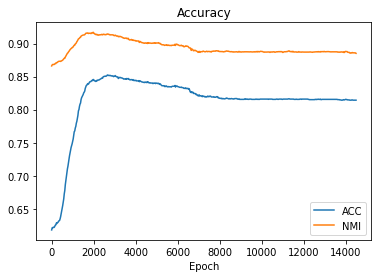

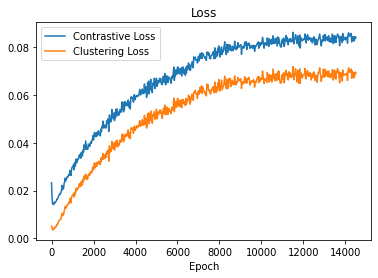

In [21]:
# print('log_JSD_mm_wo_ln2_Tweet_1_5')

# plt.title('Accuracy')
# plt.xlabel('Epoch')
# plt.plot(df_all['Step'], df_all['[Model] ACC'], label='ACC')
# plt.plot(df_all['Step'], df_all['NMI Model'], label='NMI')
# plt.legend()
# plt.show()

# plt.title('Loss')
# plt.xlabel('Epoch')
# plt.plot(df_all['Step'], df_all['Contrastive Loss'], label='Contrastive Loss')
# plt.plot(df_all['Step'], df_all['Clustering Loss'], label='Clustering Loss')
# plt.legend()
# plt.show()

plot_acc_and_loss('log_JSD_mm_wo_ln2_Tweet_1_5.csv')
plot_acc_and_loss('log_JSD_mm_wo_ln2_Tweet_1_10.csv')
plot_acc_and_loss('log_JSD_mm_wo_ln2_Tweet_1_50.csv')

In [134]:
df_max = df_all.iloc[df_all['[Model] ACC'].argmax()]

In [138]:
df_max['Note: ...']
df_max = df_all.loc[df_all['Note: ...'] == '_search_snippets_distil_lre-4_JSD_lr=6/4/4 scale=1/100 batch= 300_']

In [139]:
df_max

,Time,Step,Contrastive Loss,Clustering Loss,[Representation] ACC,[Model] ACC,NMI Model,Note: ...
394,12/07/2021 20:48:58,0,1.11096,0.01643,0.72877,0.73266,0.59237,_search_snippets_distil_lre-4_JSD_lr=6/4/4 sca...
395,12/07/2021 20:50:57,50,5.80915,4.44256,0.73817,0.73639,0.59733,_search_snippets_distil_lre-4_JSD_lr=6/4/4 sca...
453,12/07/2021 22:35:25,0,1.11096,0.01643,0.72877,0.73266,0.59237,_search_snippets_distil_lre-4_JSD_lr=6/4/4 sca...
454,12/07/2021 22:37:25,50,5.80915,4.44256,0.73817,0.73639,0.59733,_search_snippets_distil_lre-4_JSD_lr=6/4/4 sca...
455,12/07/2021 22:39:22,100,14.38357,12.78534,0.73306,0.73549,0.58547,_search_snippets_distil_lre-4_JSD_lr=6/4/4 sca...
456,12/07/2021 22:41:19,150,19.10373,17.46056,0.73047,0.74076,0.59478,_search_snippets_distil_lre-4_JSD_lr=6/4/4 sca...
457,12/07/2021 22:43:17,200,21.95894,20.28811,0.74084,0.75097,0.61267,_search_snippets_distil_lre-4_JSD_lr=6/4/4 sca...
458,12/07/2021 22:45:14,250,24.14501,22.44534,0.75600,0.75357,0.61889,_search_snippets_distil_lre-4_JSD_lr=6/4/4 sca...
459,12/07/2021 22:47:11,300,23.85307,22.11236,0.75867,0.75924,0.62767,_search_snippets_distil_lre-4_JSD_lr=6/4/4 sca...
460,12/07/2021 22:49:08,350,23.92152,22.09126,0.75713,0.75502,0.62587,_search_snippets_distil_lre-4_JSD_lr=6/4/4 sca...


search_snippets_distil_lre-4_JSD_lr=6/4/4 scale=1/60 batch=256
Train - Test / 100


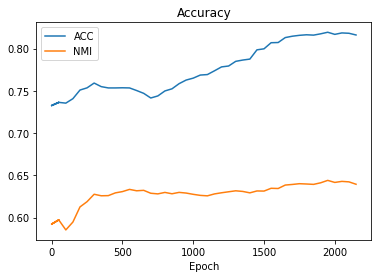

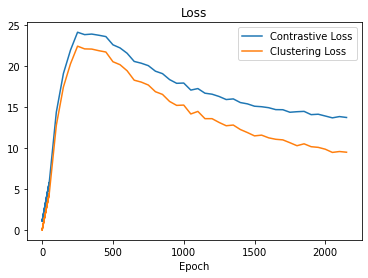

In [140]:
print('search_snippets_distil_lre-4_JSD_lr=6/4/4 scale=1/60 batch=256')
print('Train - Test / 100')
plt.title('Accuracy')
plt.xlabel('Epoch')
plt.plot(df_max['Step'], df_max['[Model] ACC'], label='ACC')
plt.plot(df_max['Step'], df_max['NMI Model'], label='NMI')
plt.legend()
plt.show()

plt.title('Loss')
plt.xlabel('Epoch')
plt.plot(df_max['Step'], df_max['Contrastive Loss'], label='Contrastive Loss')
plt.plot(df_max['Step'], df_max['Clustering Loss'], label='Clustering Loss')
plt.legend()
plt.show()

In [154]:
a = [torch.rand(768, 10)]
# torch.FloatTensor(a[0]).transpose(1, -1)t
torch.stack(a).squeeze().transpose(1, -1).shape

torch.Size([768, 10])

In [32]:
#output from 3 cnns
cnn3 = torch.rand(50, 768)
cnn5 = torch.rand(50, 768)
cnn7 = torch.rand(50, 768)

#prepare shape for concat
cnn3 = cnn3.unsqueeze(1)
cnn5 = cnn5.unsqueeze(1)
cnn7 = cnn7.unsqueeze(1)

print('cnn3[0,0,0]', cnn3[0,0,0])
print('cnn5[0,0,0]', cnn5[0,0,0])
print('cnn7[0,0,0]', cnn7[0,0,0])

#concat then mean
cat = torch.cat([cnn3, cnn5, cnn7], dim =1)
mean = torch.mean(cat, dim =1)

print('mean[0,0]',mean[0,0])
print(mean.shape)

cnn3[0,0,0] tensor(0.4590)
cnn5[0,0,0] tensor(0.0831)
cnn7[0,0,0] tensor(0.5560)
mean[0,0] tensor(0.3661)
torch.Size([50, 768])


In [69]:
# RE-MAP TWEET DATASET

df = pd.read_csv('./datasets/tweet-original-order.txt', sep='\t', names=["label", "text", "_"])
df = df.sort_values(by=['label'])
labels = df.label.values

curr_label = 1
last_tw = -1
label_dict = {}
for i, n in enumerate(labels):
    if n > last_tw:
        label_dict.update({n: curr_label})
        curr_label += 1
    last_tw = n
    
df['label'] = df['label'].map(label_dict)
df.to_csv('./datasets/tweet_remap_label', index=False, sep='\t', header = False)

In [144]:
vectors = [torch.arange(24.0).reshape(2,3,4), torch.arange(24.0).reshape(2,3,4)]
print('vectors',vectors)
len(vectors)

vectors [tensor([[[ 0.,  1.,  2.,  3.],
         [ 4.,  5.,  6.,  7.],
         [ 8.,  9., 10., 11.]],

        [[12., 13., 14., 15.],
         [16., 17., 18., 19.],
         [20., 21., 22., 23.]]]), tensor([[[ 0.,  1.,  2.,  3.],
         [ 4.,  5.,  6.,  7.],
         [ 8.,  9., 10., 11.]],

        [[12., 13., 14., 15.],
         [16., 17., 18., 19.],
         [20., 21., 22., 23.]]])]


2

In [135]:
cat = torch.cat([vectors[0].unsqueeze(1) , vectors[1].unsqueeze(1)], dim =1)
mean = torch.mean(cat, dim =1)
mean

tensor([[[ 0.,  1.,  2.,  3.],
         [ 4.,  5.,  6.,  7.],
         [ 8.,  9., 10., 11.]],

        [[12., 13., 14., 15.],
         [16., 17., 18., 19.],
         [20., 21., 22., 23.]]])

In [136]:
mean.shape

torch.Size([2, 3, 4])

In [137]:
cat.shape

torch.Size([2, 2, 3, 4])

In [138]:
len(vectors)

2

In [139]:
a = torch.stack(vectors)
a

tensor([[[[ 0.,  1.,  2.,  3.],
          [ 4.,  5.,  6.,  7.],
          [ 8.,  9., 10., 11.]],

         [[12., 13., 14., 15.],
          [16., 17., 18., 19.],
          [20., 21., 22., 23.]]],


        [[[ 0.,  1.,  2.,  3.],
          [ 4.,  5.,  6.,  7.],
          [ 8.,  9., 10., 11.]],

         [[12., 13., 14., 15.],
          [16., 17., 18., 19.],
          [20., 21., 22., 23.]]]])

In [143]:
len(a)

2

In [140]:
cat = torch.cat([a[0].unsqueeze(1) , a[1].unsqueeze(1)], dim =1)
mean = torch.mean(cat, dim =1)
mean

tensor([[[ 0.,  1.,  2.,  3.],
         [ 4.,  5.,  6.,  7.],
         [ 8.,  9., 10., 11.]],

        [[12., 13., 14., 15.],
         [16., 17., 18., 19.],
         [20., 21., 22., 23.]]])

In [141]:
mean.shape

torch.Size([2, 3, 4])

In [ ]:
cat = torch.cat([vectors[0].unsqueeze(1) , vectors[1].unsqueeze(1)], dim =1)
mean = torch.mean(cat, dim =1)

In [90]:
mean[0,0,0]

tensor(0.0281)

In [123]:
l = torch.arange(24.0)
l = l.reshape(2,3,4)
l+=2
m = torch.arange(24.0)
m = m.reshape(2,3,4)
print('l.shape', l.shape)
print('m.shape', m.shape)
print('l', l)
print('m', m)

l.shape torch.Size([2, 3, 4])
m.shape torch.Size([2, 3, 4])
l tensor([[[ 2.,  3.,  4.,  5.],
         [ 6.,  7.,  8.,  9.],
         [10., 11., 12., 13.]],

        [[14., 15., 16., 17.],
         [18., 19., 20., 21.],
         [22., 23., 24., 25.]]])
m tensor([[[ 0.,  1.,  2.,  3.],
         [ 4.,  5.,  6.,  7.],
         [ 8.,  9., 10., 11.]],

        [[12., 13., 14., 15.],
         [16., 17., 18., 19.],
         [20., 21., 22., 23.]]])


In [124]:
cat = torch.cat([l.unsqueeze(1) , m.unsqueeze(1)], dim =1)

In [125]:
cat.shape

torch.Size([2, 2, 3, 4])

In [126]:
mean = torch.mean(cat, dim =1)

In [127]:
mean

tensor([[[ 1.,  2.,  3.,  4.],
         [ 5.,  6.,  7.,  8.],
         [ 9., 10., 11., 12.]],

        [[13., 14., 15., 16.],
         [17., 18., 19., 20.],
         [21., 22., 23., 24.]]])

In [128]:
mean.shape

torch.Size([2, 3, 4])

In [34]:
def plot_acc_and_loss(filename):
    df_all = pd.read_csv(filename) 
    print(filename)

    plt.title('Accuracy')
    plt.xlabel('Epoch')
    plt.plot(df_all['Step'], df_all['[Model] ACC'], label='ACC')
    plt.plot(df_all['Step'], df_all['NMI Model'], label='NMI')
    plt.legend()
    plt.show()

    plt.title('Loss')
    plt.xlabel('Epoch')
    plt.plot(df_all['Step'], df_all['Contrastive Loss'], label='Contrastive Loss')
    plt.plot(df_all['Step'], df_all['Clustering Loss'], label='Clustering Loss')
    plt.legend()
    plt.show()
    
def plot_NMI_and_acc(filename, plot_name = '',last_step= 0):
    df = pd.read_csv(filename) 
    print(plot_name)
    if last_step == 0:
        last_step = len(df)
    plt.plot(df['Step'][:last_step], df['NMI Model'][:last_step], label='NMI', color='orange')
    plt.legend()
    plt.show()
    plt.plot(df['Step'][:last_step], df['[Representation] ACC'][:last_step], label='[Representation] ACC')
    plt.plot(df['Step'][:last_step], df['[Model] ACC'][:last_step], label='[Model] ACC')
    plt.legend()
    plt.show()

Tweet 1_5


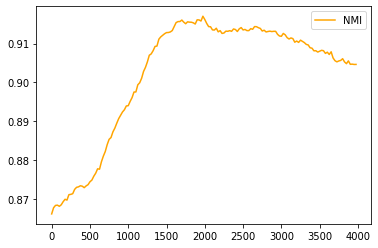

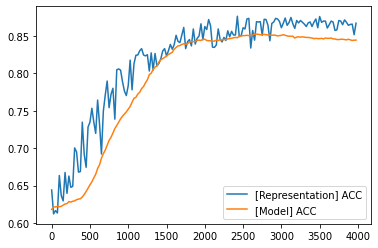

Tweet 1_10


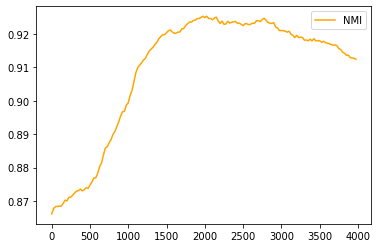

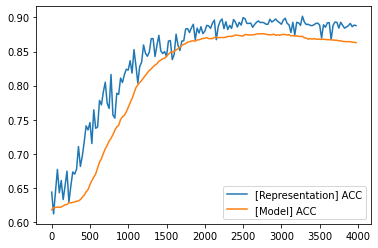

Tweet 1_50


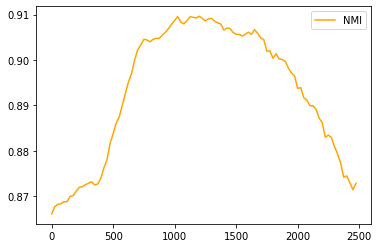

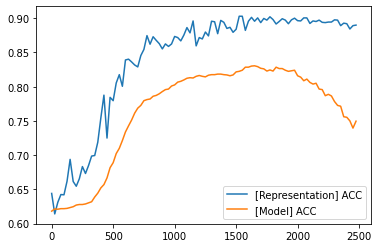

In [40]:
plot_NMI_and_acc('log_JSD_mm_wo_ln2_Tweet_1_5.csv', 'Tweet 1_5', 160)
plot_NMI_and_acc('log_JSD_mm_wo_ln2_Tweet_1_10.csv', 'Tweet 1_10', 160)
plot_NMI_and_acc('log_JSD_mm_wo_ln2_Tweet_1_50.csv', 'Tweet 1_50', 100)

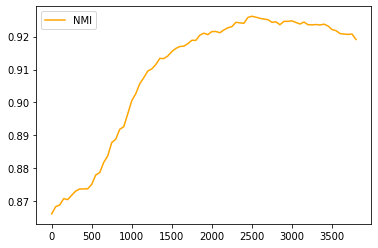

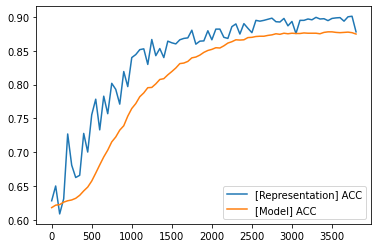

In [42]:
df = pd.read_csv('log_JSD_mm_wo_ln2_tweet.csv') 
plt.plot(df['Step'][:77], df['NMI Model'][:77], label='NMI', color='orange')
plt.legend()
plt.show()


plt.plot(df['Step'][:77], df['[Representation] ACC'][:77], label='[Representation] ACC')
plt.plot(df['Step'][:77], df['[Model] ACC'][:77], label='[Model] ACC')
plt.legend()
plt.show()

In [39]:
import os
import pandas as pd
import torch.utils.data as util_data
from torch.utils.data import Dataset, random_split
import math
import torch

class AugmentPairSamples(Dataset):
    def __init__(self, train_x_0, train_y, train_x_1 = None):
        
        if train_x_1 is not None:
            assert len(train_y) == len(train_x_0) == len(train_x_1)
        else:
            assert len(train_y) == len(train_x_0)
            
        self.train_x_0 = train_x_0
        self.train_x_1 = train_x_1
        self.train_y = train_y                
        
        
    def __len__(self):
        return len(self.train_y)

    def __getitem__(self, idx):
        if self.train_x_1 is not None:
            return {'text0': self.train_x_0[idx], 'text1': self.train_x_1[idx],'label': self.train_y[idx], 'index': idx}
        else:
            return {'text0': self.train_x_0[idx], 'label': self.train_y[idx], 'index': idx}

def augment_loader():
    
##     W/o augmentation : read csv and set the name of headers
#     train_data = pd.read_csv(os.path.join(args.data_path, args.dataname), names=["label", "text", "_"])



    # For Paraphrase
#     train_data = pd.read_csv(os.path.join(args.data_path, args.dataname), sep='\t')
    
    # For Contextual
    train_data = pd.read_csv(os.path.join('./datasets/augmented/contextual_20/', 'agnewsdataraw-8000'))
    
##     W/o augmentation
#     train_data['text'] = train_data['text'].str.strip()
    
##     W/o augmentation : has only original text and label 
#     train_text = train_data['text'].fillna('.').values
#     train_label = train_data['label'].astype(int).values

##    W/ augmentation : original text and 1 augmented data
    train_text_0 = train_data['text0'].fillna('.').values
    train_text_1 = train_data['text1'].fillna('.').values
    train_label = train_data['label'].astype(int).values

##    W/o augmentation 
#     train_dataset = AugmentPairSamples(train_text, train_label)
    train_dataset = AugmentPairSamples(train_text_0, train_label, train_text_1)
    
    train_loader = util_data.DataLoader(train_dataset, batch_size=256, shuffle=True, num_workers=4)
    
    return train_loader

In [44]:
data_loader = augment_loader()

In [45]:
import numpy as np
for i in np.arange(1000):
    try:
        print(i, count)
        count += 1
        batch = next(train_loader_iter)  
    except:
        train_loader_iter = iter(data_loader)
        batch = next(train_loader_iter)
        count = 0

0 7
1 8
2 9
3 10
4 11
5 12
6 13
7 14
8 15
9 16
10 17
11 18
12 19
13 20
14 21
15 22
16 23
17 24
18 25
19 26
20 27
21 28
22 29
23 30
24 31
25 0
26 1
27 2
28 3
29 4
30 5
31 6
32 7
33 8
34 9
35 10
36 11
37 12
38 13
39 14
40 15
41 16
42 17
43 18
44 19
45 20
46 21
47 22
48 23
49 24
50 25
51 26
52 27
53 28
54 29
55 30
56 31
57 0
58 1
59 2
60 3
61 4
62 5
63 6
64 7
65 8
66 9
67 10
68 11
69 12
70 13
71 14
72 15
73 16
74 17
75 18
76 19
77 20
78 21
79 22
80 23
81 24
82 25
83 26
84 27
85 28
86 29
87 30
88 31
89 0
90 1
91 2
92 3
93 4
94 5
95 6
96 7
97 8
98 9
99 10
100 11
101 12
102 13
103 14
104 15
105 16
106 17
107 18
108 19
109 20
110 21
111 22
112 23
113 24
114 25
115 26
116 27
117 28
118 29
119 30
120 31
121 0
122 1
123 2
124 3
125 4
126 5
127 6
128 7
129 8
130 9
131 10
132 11
133 12
134 13
135 14
136 15
137 16
138 17
139 18
140 19
141 20
142 21
143 22
144 23
145 24
146 25
147 26
148 27
149 28
150 29
151 30
152 31
153 0
154 1
155 2
156 3
157 4
158 5
159 6
160 7
161 8
162 9
163 10
164 11
165 12
1

In [41]:
train_data = pd.read_csv(os.path.join('./datasets/augmented/contextual_20/', 'agnewsdataraw-8000'))
train_text_0 = train_data['text0'].fillna('.').values
train_text_1 = train_data['text1'].fillna('.').values
train_label = train_data['label'].astype(int).values
train_dataset = AugmentPairSamples(train_text_0, train_label, train_text_1)
len(train_data['text0'])

8000

In [48]:
batch['index']

tensor([1122, 5231,  239,  219, 5098, 3990, 7673, 4643, 4794, 3111,   48, 1624,
        1087, 3161, 4808, 7994, 2980, 1349, 7588, 6016, 7740, 3984, 6795, 7744,
        4940, 2412, 3154, 1911,  483, 1432, 6983, 2286, 5794,   38, 4094, 2431,
        1638, 7415, 3337, 1011, 6550, 6676, 5987, 1634,  119, 2852,  311, 3868,
        2976, 7587, 4260,   22, 3578, 3808, 2854, 1411, 6237, 2513, 3526, 7302,
        6831, 3380, 4895, 3759, 5962, 5597, 4809, 7737, 2206, 1805, 5857,  227,
        7436, 7990, 7243,  578, 6800, 7329, 1520, 6533, 1756, 4858, 6106, 3925,
        7592, 1175, 1355, 3321, 2241, 7852,  591, 6338, 2271,  517, 7783, 6418,
        1839,  362, 4564, 3212, 1804, 2785, 5228,   74, 3178, 1641, 5902, 3449,
        4816, 5417, 1209, 1531, 1508,    9, 4616, 6604, 5471,  467,  751, 5229,
        2136, 2957, 4583, 4613, 2645, 4016, 5340, 4823, 2892,  855, 4050, 1204,
        1003, 5428,  537, 2354, 2072, 7465, 5039, 1752, 7910,  226, 1103, 7218,
         760, 7325, 3816, 5519, 2676, 53

In [ ]:
pd.read_csv('')